## 感知器（Perceptron）模型

感知器模型是较为简单的线性模型。

### 基本模型

（一）假设函数：

$$h(x)=sign(w^Tx)$$

其中sign()表示括号内式子大于0时取值1,小于等于0时取值-1，$w_T=(w_0,w_1,...,w_m)$，$x=(x_0,x_1,...,x_m)$，$x_0=1$。

为了下文叙述方便，我们设$w_0=b$，$h(x)=sign(\sum_{i=1}^nw_ix_i+b)=sign(w^Tx+b)$。其中$w$和$b$确定了一个**超平面**$h$，其中$w^Th+b=0$。在超平面的一侧，数据点为正例，在另一侧为负例。


（二）损失函数：

我们需要损失函数来衡量算法预测值与真实值之间的偏差，首先可能想到的损失函数是错误分类的个数，但此损失函数对于$w,b$来说不可导，因此不能利用梯度下降的方法进行训练。因此我们选择了另外一个叫做**误分类点到超平面的总距离**作为损失函数。

<img src="fig1-1.png" width="600px" align="center" />

点$x$到超平面的距离为：
$$\frac{|w^Tx+b|}{||w||}$$

推导过程：

由图中可知$z=x+y$，由于$y$与法向量$w$共线，可设$y=\lambda w$，可得$z=x+\lambda w$。

由于$z$点在超平面上，所以$w^Tz+b=0$，可得$w^Tx+\lambda w^Tw+b=0$，于是$\lambda =\frac{-(w^Tx+b)}{w^Tw}$。

所以点$x$到超平面的距离$d=||y||=|\lambda|||w||=\frac{|w^Tx+b|}{||w||}$。


当点$x$为误分类点时，$y^iw^Tx+b\le0$，此时$|w^Tx+b|$可化为$-y(w^Tx+b)$。

所以最终的损失函数为：

$$L(w,b)=\sum_{i=1}^{n}-y^i(w^Tx^i+b)$$


（三）梯度下降求$w,b$：

初始化$w$和$b$,对于训练集中的每个错误分类的样本，执行：

update simultaniously {

$w=w+\alpha \sum_{i=1}^{n}y^ix^i$

$b=b+\alpha \sum_{i=1}^{n}y^i$

} repeat until there are no mistakes

其中$\alpha$为学习率，通常取值为0.01-0.3。

优化：

传统的梯度下降方法每次更新权值时，都需要遍历所有的错误分类的样本，这样使得训练过程十分缓慢，可以使用随机梯度下降方法对上述过程进行优化。

### Pocket PLA
在真实世界中，数据经常是线性不可分的或者存在一定的噪音，这样会造成上述训练过程不会收敛，因此有人提出Pocket PLA训练方法，先在“口袋”里保存一个初始权值，在每次权值更新之后计算总误差（误分类点到超平面的距离之和），当总误差比口袋里的更小时，则替换掉口袋里的权值，最后返回口袋里的权值。


### Code from Scratch
下面是二维数据点的代码演示，其中有10个数据点，中间的绿色线为超平面。

Result:
[[ 0.02 ]
 [ 0.048]
 [-0.64 ]]


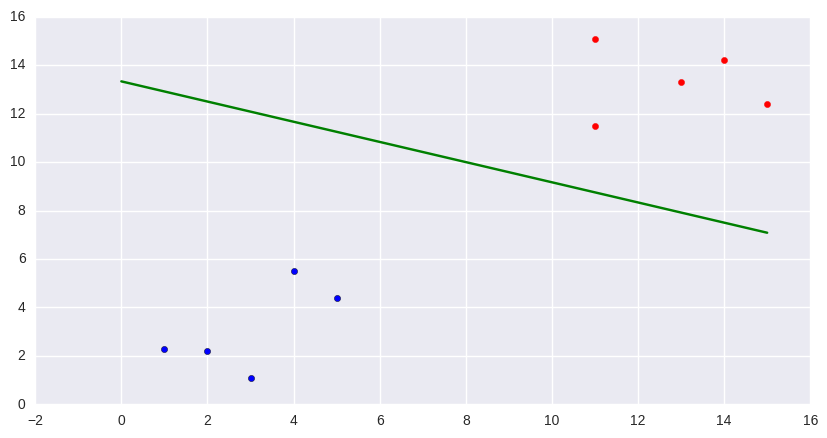

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X=np.asarray([[3.,1.1],
              [2.,2.2],
              [1.,2.3],
              [5.,4.4],
              [4.,5.5],
              [11.,11.5],
              [15.,12.4],
              [13.,13.3],
              [14.,14.2],
              [11.,15.1]])
y=np.asarray([-1.,-1.,-1.,-1.,-1.,1.,1.,1.,1.,1.])

plt.figure(figsize=(10,5))
plt.scatter(X[y==-1,0],X[y==-1,1])
plt.scatter(X[y==1,0],X[y==1,1],color='r')

# 增加一列1向量
X=np.hstack([X,np.ones(shape=(X.shape[0],1))])
y=y.reshape(len(y),1)

alpha=0.01 # 学习速率
w=np.zeros(shape=(X.shape[1],1))# 初始化权重为0向量

while True:
    mask=np.sign(np.dot(X,w))!=np.sign(y)
    mask=mask.flatten()
#     print 'Mask:',mask

    # 判断是否还有误分类点
    if len(np.nonzero(mask)[0])<=0:
        break;
    
    X_m=X[mask,:]
    y_m=y[mask,:]
    
    # 梯度
    w=w+alpha*(np.dot(X_m.T,y_m))

print 'Result:'
print w

# Test
# print 'Check:'
# for row in X:
#     print 'x={},wx={}'.format(row,np.dot(row,w))

# 超平面
k=-w[0,0]/w[1,0]
b=-w[2,0]/w[1,0]

x=np.arange(16)
y=k*x+b

plt.plot(x,y,color='g')
plt.show()

References

[1] http://www.cnblogs.com/wacc/p/3848418.html